In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D, MaxPooling1D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics
import pandas as pd

from keras.models import Sequential
from keras.layers.recurrent import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Conv1D
from keras.callbacks import ReduceLROnPlateau,ModelCheckpoint

from sklearn.model_selection import train_test_split # to split dataset into train and test
from sklearn import preprocessing
from keras.preprocessing.sequence import pad_sequences

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE


from pandas_profiling import ProfileReport
import sys
sys.path.append('../')
from time_series_dataset_loader import TimeSeriesDatasetLoader
from ppcm import pretty_plot_confusion_matrix


Using TensorFlow backend.
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gabriel/.pyenv/versions/3.6.4/envs/machine-learning/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  

In [3]:
def discretization(X):
    new_dataset = []
    for data_instance in X:
        new_instance = []
        for row in data_instance:
            new_instance.append(np.average(row[2:]))
        new_dataset.append(new_instance)
        
    return np.asarray(new_dataset)

In [4]:
def add_padding(X,y):
    X = np.asarray(X)
    y = np.asarray(y)
    
    max_len = len(X[0])
    for row in X:
        if len(row) > max_len:
            max_len = len(row)

    X = pad_sequences(X, maxlen=max_len, padding='post', dtype='float64')
    return X, y

In [5]:
def group_labels(labels, ignore_neutral=False):
    new_labels = []
    for value in labels:
        if value in [3,5]:
            new_labels.append(1)
        else:
            if value == 0 and not ignore_neutral:
                new_labels.append(3)
            else:
                new_labels.append(2)
    
    return np.asarray(new_labels)

In [4]:
def data_preprocessing(X):
    new_dataset = []
    for data_instance in X:
        new_instance = []
        for row in data_instance:
            new_instance.append(row[2:])
        new_dataset.append(new_instance)
        
    return np.asarray(new_dataset)

In [ ]:
def create_model(X_train, y_train, X_test, y_test):
 

In [2]:
DATASET_PATH = '../../datasets/Original/MFCC'
dataset_loader = TimeSeriesDatasetLoader(DATASET_PATH)


In [5]:
X, y = dataset_loader.get_dataset(type_='default', ignore_neutral=False)
X = data_preprocessing(X)

In [12]:
index_means = []

In [ ]:
for index in range(0, len(X[0])):
    index_values = []
    for data_instance in X:
        for row in data_instance:
            index_values.append

In [7]:
pd.DataFrame(X)

,0
0,"[[-7.148636, 12.297789999999999, -5.484195, 2...."
1,"[[-4.048771, -4.878177, -8.334724000000001, -3..."
2,"[[8.132907000000001, 7.948167999999999, 0.0850..."
3,"[[1.552135, -11.32509, -10.14242, 0.7451331999..."
4,"[[0.8976721999999999, 4.055397, -0.5611823, 5...."
...,...
1159,"[[-0.9593430000000001, 10.2383, 11.47455, 13.4..."
1160,"[[0.34619, -0.04145023, 11.219389999999999, -1..."
1161,"[[6.465412000000001, 2.722443, 5.986939, -5.97..."
1162,"[[2.0214939999999997, -13.71375, -12.73896, 6...."


In [8]:
X = discretization(X)


In [8]:
X = preprocessing.normalize(X)

In [13]:
X, y = add_padding(X,y)

In [14]:
X = np.asarray(X)
y = np.asarray(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3)

# Reshaping to apply smote
shape_0 = X_train.shape[0]
shape_1 = X_train.shape[1]
shape_2 = X_train.shape[2]
X_train = X_train.reshape(shape_0, shape_1 * shape_2)

# Apply SMOTE
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

# Reshaping back to original shape dimensions 1 and 2
X_train = X_train.reshape(X_train.shape[0], shape_1, shape_2)

# Create categorical matrices
y_test_labels = y_test
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshaping X to fit model
num_rows = X[0].shape[0]
num_columns = X[0].shape[1]
num_channels = 1
##############

X_train = X_train.reshape(X_train.shape[0], num_rows, num_columns,num_channels)
X_test = X_test.reshape(X_test.shape[0], num_rows, num_columns,num_channels)

In [ ]:
###
num_rows = X_train[0].shape[0]
num_columns = X_train[0].shape[1]
num_channels = 1
####
# Construct model
model = Sequential()
model.add(Conv2D(filters=128,
                 kernel_size=2,
                 input_shape=(num_rows, num_columns, num_channels),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=2,
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2,
                 activation='relu'))
model.add(MaxPooling2D(pool_size=1))
model.add(Dropout(0.3))
model.add(GlobalAveragePooling2D())

model.add(Dense(7, activation='softmax'))

# Compile the keras model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Define bath and epochs
batch_size = 128
epochs = 200

# Callbacks and fitting model
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9,
                              patience=20, min_lr=0.0000001)
mcp_save = ModelCheckpoint('../model_checkpoints/new_test.h5',
                           save_best_only=True, monitor='val_loss',
                           mode='min')

result = model.fit(X_train, y_train, batch_size=batch_size,
                   epochs=epochs, validation_data=(X_test, y_test),
                   callbacks=[mcp_save, lr_reduce], verbose=2)



Train on 868 samples, validate on 350 samples
Epoch 1/200
 - 44s - loss: 2.0341 - accuracy: 0.1394 - val_loss: 1.9888 - val_accuracy: 0.1514
Epoch 2/200
 - 64s - loss: 1.9612 - accuracy: 0.1498 - val_loss: 1.9555 - val_accuracy: 0.1257
Epoch 3/200
 - 31s - loss: 1.9493 - accuracy: 0.1406 - val_loss: 1.9483 - val_accuracy: 0.1457
Epoch 4/200


In [ ]:
 validation_acc = np.amax(result.history['val_accuracy'])
print('Best validation acc of epoch:', validation_acc)

In [131]:
predictions = model.predict(X_test, verbose=1)
predictions_labels = []
for predict in predictions:
    predictions_labels.append(predict.tolist().index(np.amax(predict)))

350/350 [==============================] - 0s 1ms/step


In [133]:
correct = 0
total = len(predictions_labels)
for index in range(0, len(predictions_labels)):
    if predictions_labels[index] == y_test_labels[index]:
        correct += 1
        
print("average: {}".format(correct/total))

average: 0.29428571428571426


In [134]:
grouped_predictions = group_labels(predictions_labels)
grouped_test_labels = group_labels(y_test_labels)
correct = 0
total = len(grouped_predictions)
for index in range(0, len(grouped_predictions)):
    if grouped_predictions[index] == grouped_test_labels[index]:
        correct += 1
        
print("average: {}".format(correct/total))

average: 0.44285714285714284


In [106]:
emotion_indexes = ['neutro', 'des', 'medo', 'alegria', 'raiva', 'surpresa', 'tristeza']

In [ ]:
emotion_indexes = 

In [ ]:
emotion_indexes = 

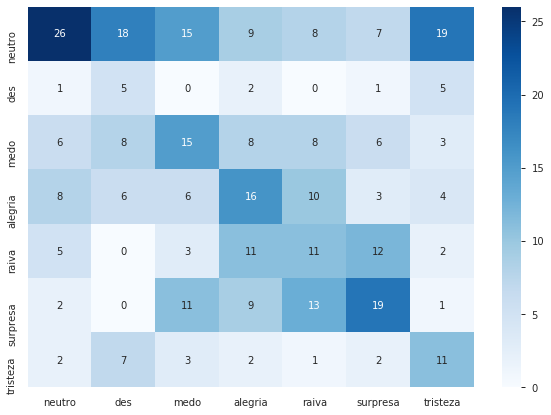

In [135]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
title = "Confusion Matrix"


import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

cm = confusion_matrix(predictions_labels, y_test_labels)


df_cm = pd.DataFrame(cm, index=emotion_indexes, columns=emotion_indexes)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap=plt.cm.Blues)

# df_cm = pd.DataFrame(array, range(6), range(6))
# # plt.figure(figsize=(10,7))
# sn.set(font_scale=1.4) # for label size
# sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [ ]:
new_predictions = group_labels(svc.predict(X_test))
correct_predictions = group_labels(y_test)

correct = 0
total = len(new_predictions)
for index in range(0, len(new_predictions)):
    if new_predictions[index] == correct_predictions[index]:
        correct += 1
        
print("average: {}".format(correct/total) )